### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

Il parametro di forma è  0.9916438241471746


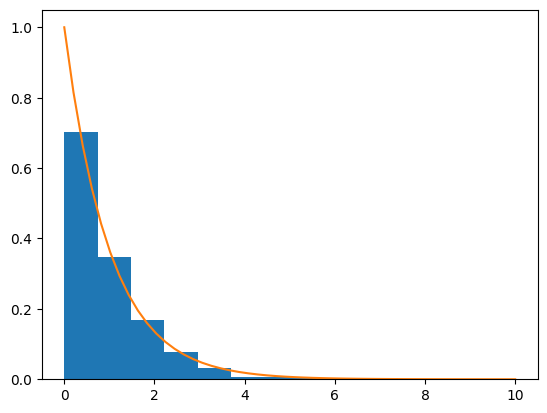

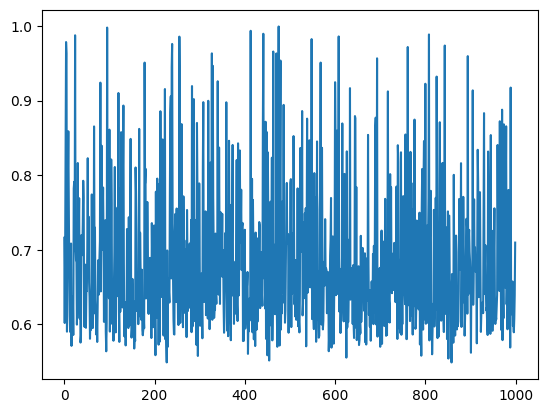

la varianza è di  0.008722403442883653


In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stat


distt=stat.gamma(1,0)
distribuzione= distt.rvs(1000)
plt.hist( distribuzione,  density=True, label='normalized histogram')
x=np.linspace(0, 10)
plt.plot(x, distt.pdf(x), label='PDF')
forma=stat.gamma.fit(distribuzione )
print("Il parametro di forma è " ,forma[0])
plt.show()
cdf=stat.gamma.cdf(x= distribuzione, a=distribuzione)
plt.plot(cdf)
plt.show()
varianza=np.var(cdf)
print('la varianza è di ', varianza)




### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

2.581793206793929
2.9601604601862284
7.5209790209928755
8.533903317211049


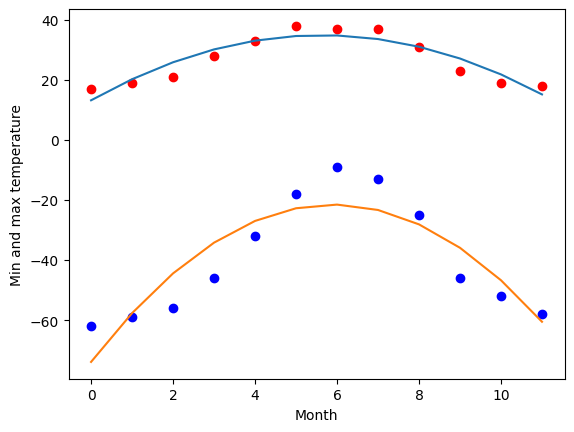

In [132]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
def quad(x,a,b,c):
    return a*x*x+b*x+c

mass, _=sp.optimize.curve_fit(quad, months, temp_max)
a, b, c = mass
mas = quad(months, a, b, c)
plt.plot(months, mas)
minn, _= sp.optimize.curve_fit(quad, months, temp_min)
a1, b2, c3 = minn
min = quad(months, a1, b2, c3)
plt.plot(months, min)
print( np.mean(np.abs(temp_max - mas)))
print( np.sqrt(np.mean((temp_max - mas)**2)))
print( np.mean(np.abs(temp_min - min)))
print(np.sqrt(np.mean((temp_min - min)**2)))

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

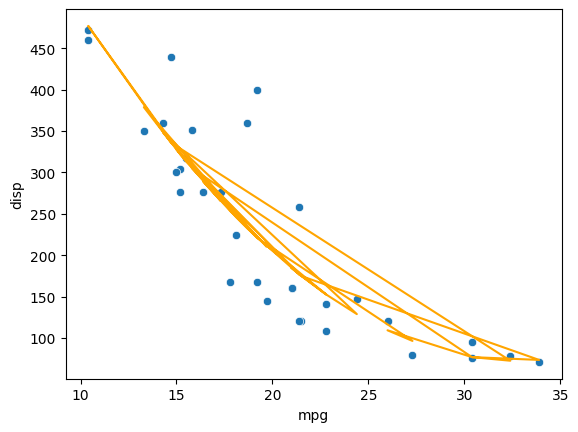

In [121]:
import pandas as pd
# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
# Display the dataframe
df
x=df['mpg']
y=df['disp']
sns.scatterplot(data= df, x= 'mpg', y= 'disp')
cubi= np.polyfit(x,y,deg=2)
fittin=np.polyval(cubi, x)

plt.plot(x, fittin, color='orange')
plt.show()